In [9]:
import nibabel as nib
import os
import numpy as np

In [10]:
from nibabel.testing import data_path

In [24]:
MRI_ = os.path.join(data_path, '/home/coleger/Desktop/CV/Alz/n_mmni_fADNI_002_S_0295_1.5T_t1w.nii.gz')
mask_ = os.path.join(data_path, '/home/coleger/Desktop/CV/Alz/mask_n_mmni_fADNI_002_S_0295_1.5T_t1w.nii.gz')

In [25]:
MRI_ = nib.load(MRI_)
mask_ = nib.load(mask_)

In [26]:
MRI = MRI_.get_fdata()
print(MRI.shape)
print(type(MRI))

mask = mask_.get_fdata()
print(mask.shape)
print(type(mask))

(181, 217, 181)
<class 'numpy.ndarray'>
(181, 217, 181)
<class 'numpy.ndarray'>


In [27]:
hdr = MRI_.header

In [28]:
print(MRI.shape)
print(mask.shape)

(181, 217, 181)
(181, 217, 181)


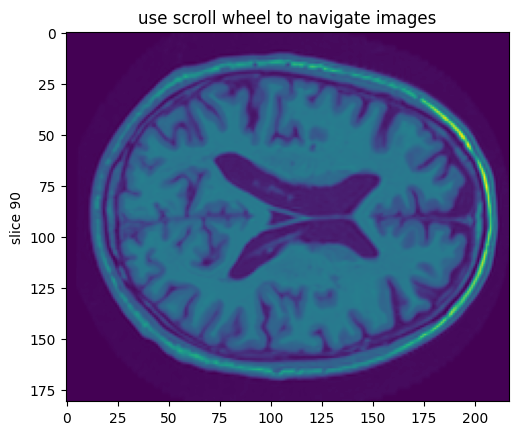

In [30]:
from matplotlib import pyplot as plt 

class IndexTracker:
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()

    def on_scroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        self.ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()


fig, ax = plt.subplots(1, 1)

tracker = IndexTracker(ax, MRI)


fig.canvas.mpl_connect('scroll_event', tracker.on_scroll)
plt.show()

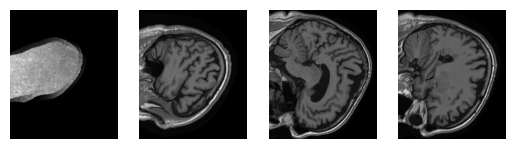

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=4)

# Loop through subplots and draw image
for ii in range(4):
    im = MRI[ii * 40, :, :]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')

# Render the figure
plt.show()

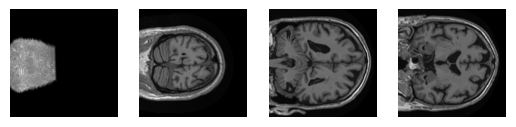

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=4)

# Loop through subplots and draw image
for ii in range(4):
    im = MRI[:, ii * 40, :]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')

# Render the figure
plt.show()

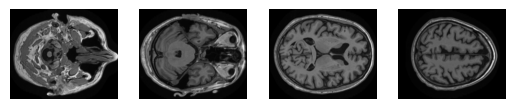

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=4)

# Loop through subplots and draw image
for ii in range(4):
    im = MRI[ :, :,ii * 40]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')

# Render the figure
plt.show()